# SVM

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv("SalaryData_Train(1).csv")
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_test=pd.read_csv("SalaryData_Test(1).csv")
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## EDA

In [4]:
df_train.shape,df_test.shape

((30161, 14), (15060, 14))

In [5]:
df_train.info(),df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
-

(None, None)

In [6]:
df_train.duplicated().sum(),df_test.duplicated().sum()

(3258, 930)

In [7]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [8]:
df_train.duplicated().sum(),df_test.duplicated().sum()

(0, 0)

In [9]:
df_train.isnull().sum(),df_test.isnull().sum()

(age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64,
 age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64)

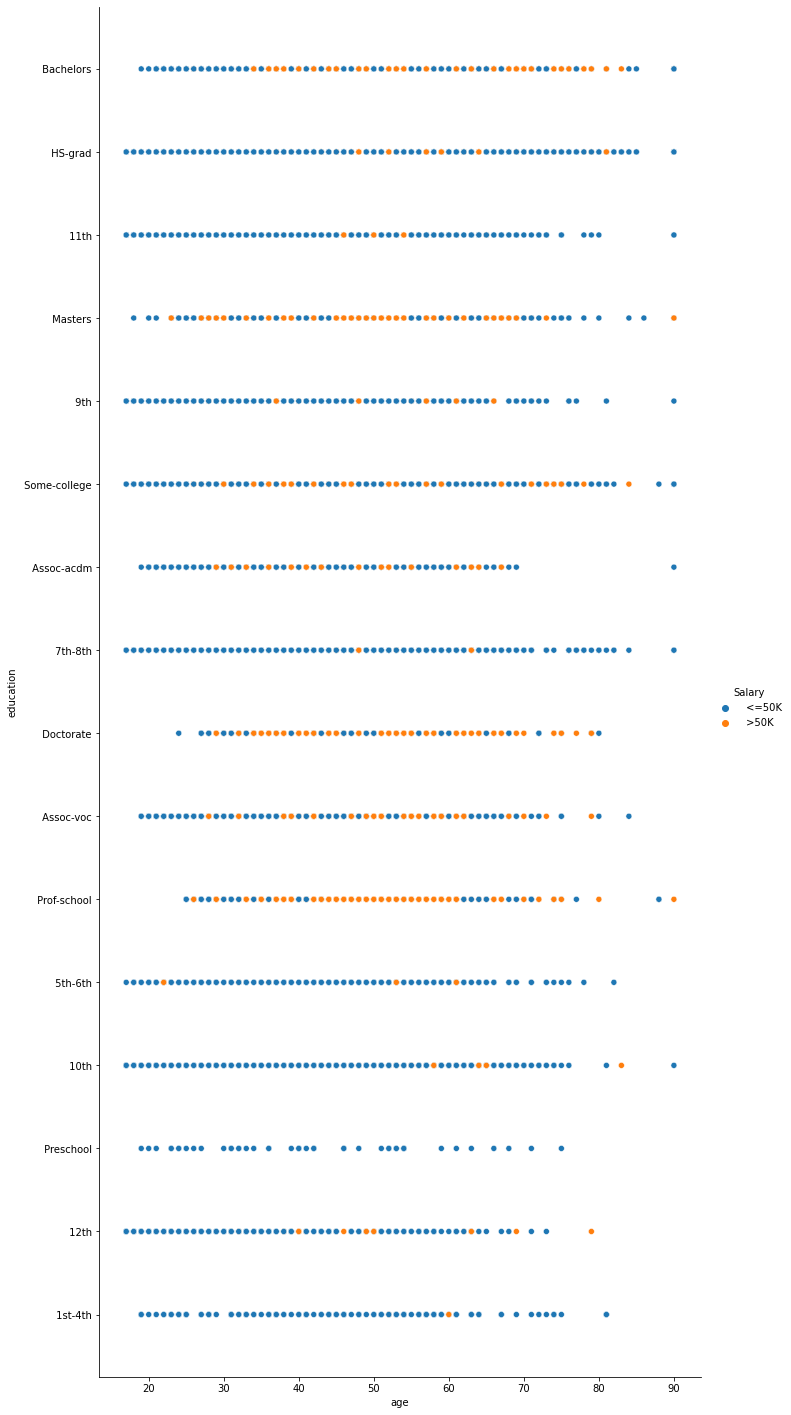

In [10]:
sns.pairplot(data=df_train,x_vars="age",y_vars="education",hue="Salary",height=20,aspect=0.5);

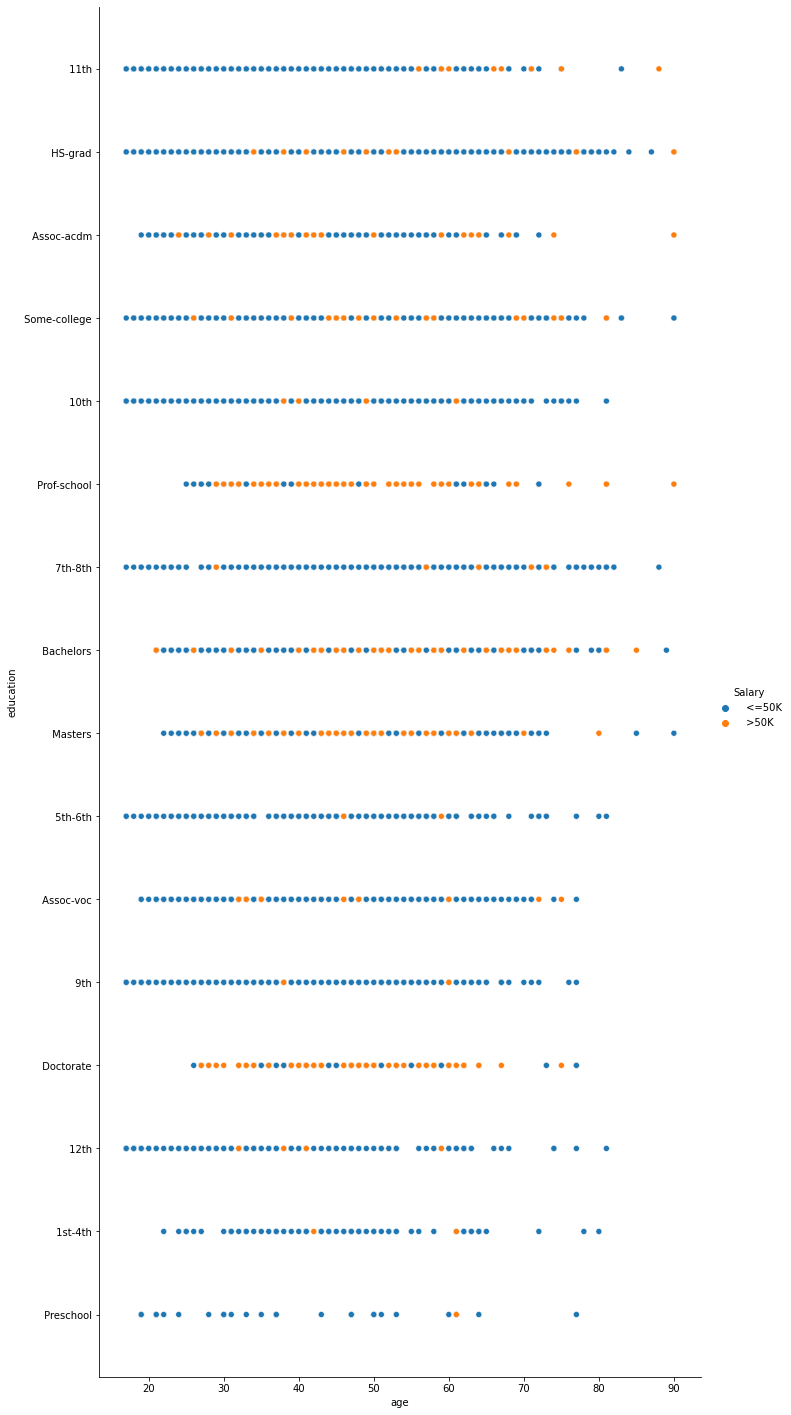

In [11]:
sns.pairplot(data=df_test,x_vars="age",y_vars="education",hue="Salary",height=20,aspect=0.5);

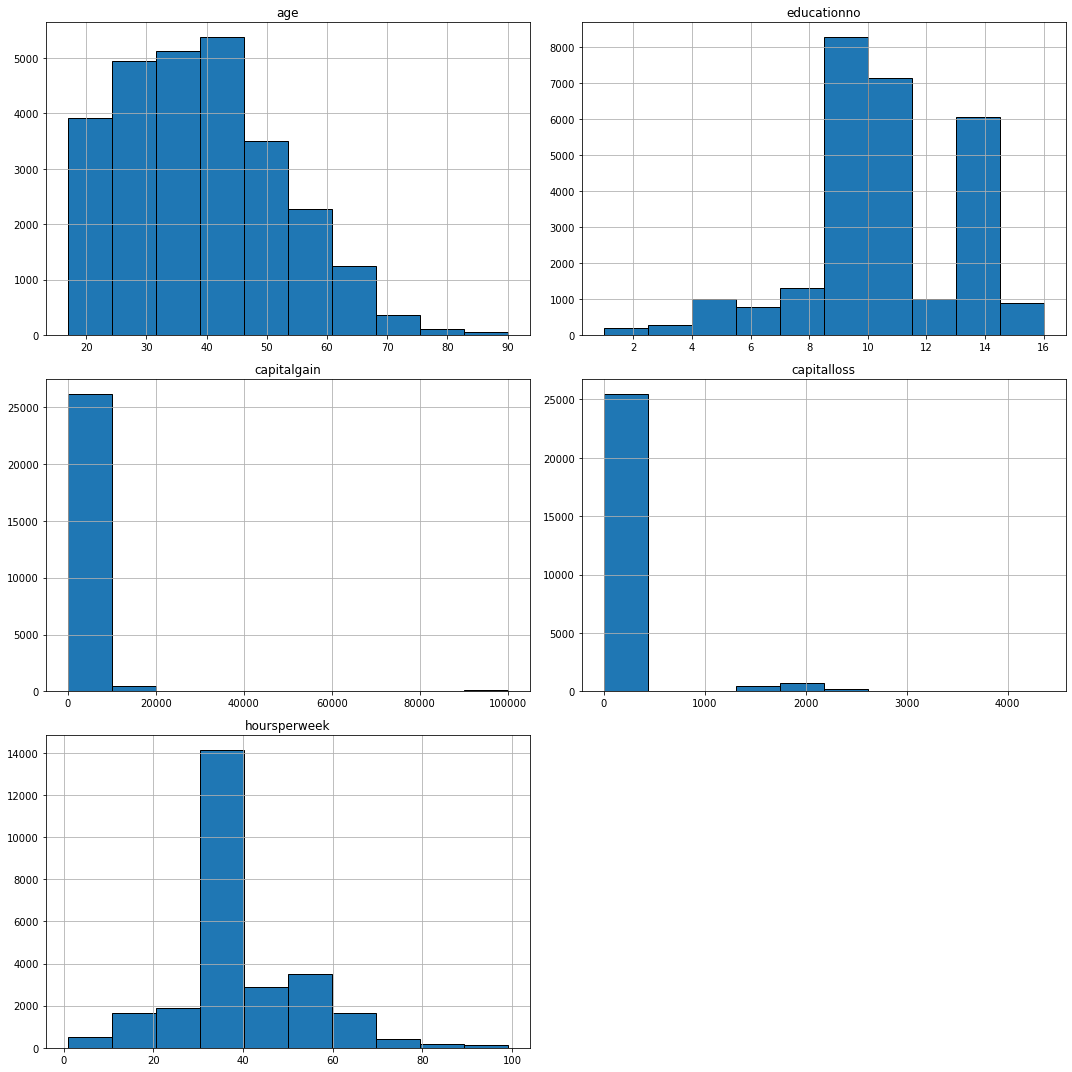

In [12]:
df_train.hist(edgecolor="k",figsize=(15,15))
plt.tight_layout();

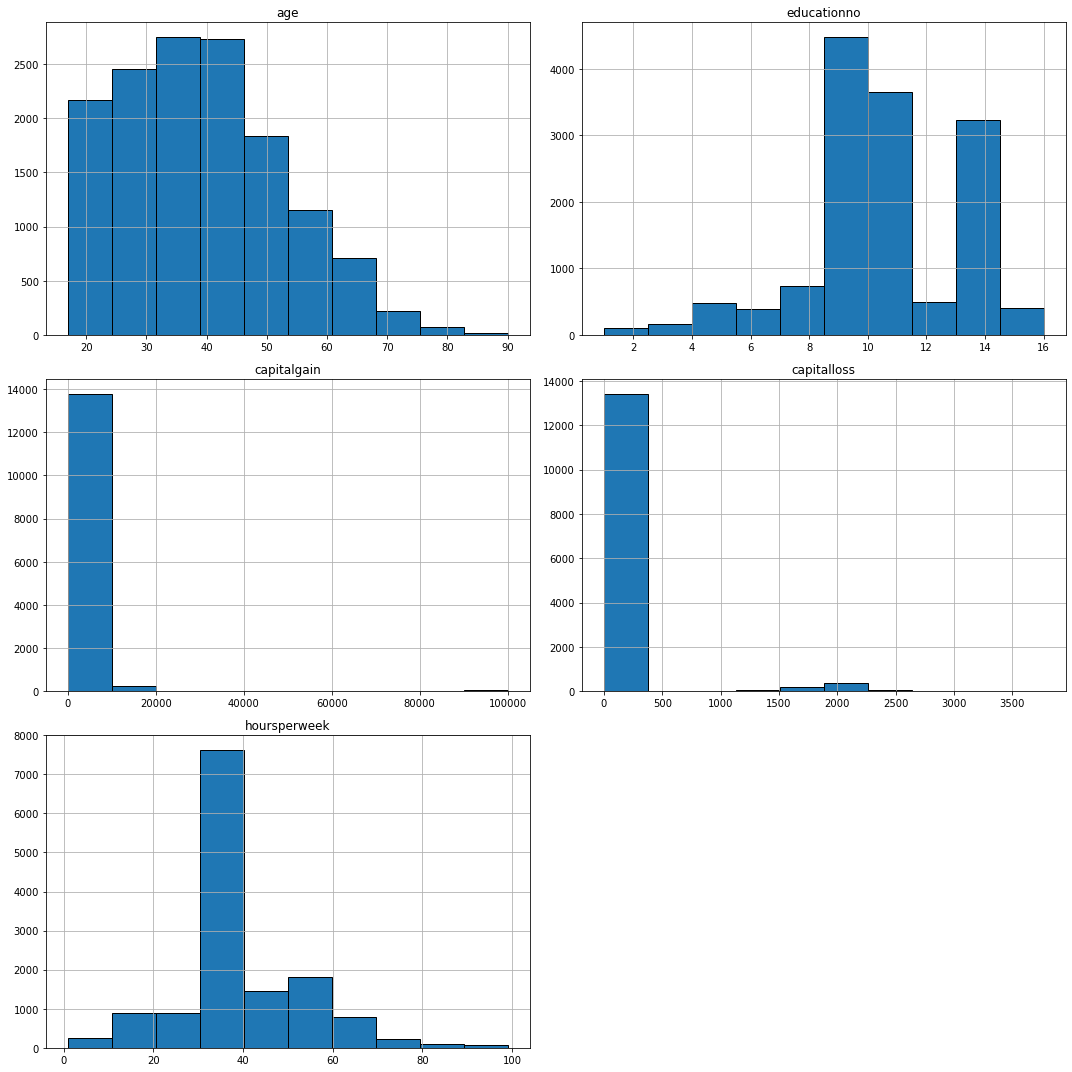

In [13]:
df_test.hist(edgecolor="k",figsize=(15,15))
plt.tight_layout();

## Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df_train[[ 'workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native']]=df_train[[ 'workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native']].apply(label.fit_transform)

df_test[[ 'workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native']]=df_test[[ 'workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native']].apply(label.fit_transform)


## Separating Independent and Target Variable

In [15]:
x_train=df_train.drop("Salary",axis=1)
y_train=df_train["Salary"]
x_test=df_test.drop("Salary",axis=1)
y_test=df_test["Salary"]

## Scaling


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled_df=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled_df=pd.DataFrame(x_test_scaled,columns=x_test.columns)

## HyperParameter Tuning

In [17]:
# create a parameter grid for SVC 

param_grid={"C":[0.1,1],
           "gamma": [1,0.1],
           "kernel" : ["rbf","linear"]}

# instatiate the SVC model and RandomizedSearchCV object and run the Randomized search 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=42)
svc=SVC()
random_search=RandomizedSearchCV(svc,param_grid,cv=kfold,verbose=2,n_jobs=-1,scoring="accuracy",random_state=42)
random_search.fit(x_train_scaled_df,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1], 'gamma': [1, 0.1],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, scoring='accuracy', verbose=2)

In [18]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}

In [19]:
best_svc=random_search.best_estimator_
best_svc

SVC(C=1, gamma=0.1)

In [20]:
pred_train1=best_svc.predict(x_train_scaled_df)
pred_test1=best_svc.predict(x_test_scaled_df)

In [21]:
from sklearn.metrics import classification_report

print("________TRAINING_DATA__________\n\n")
print(classification_report(y_train,pred_train1))
print("________TESTING_DATA__________\n\n")
print(classification_report(y_test,pred_test1))

________TRAINING_DATA__________


              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90     20023
        >50K       0.78      0.57      0.66      6880

    accuracy                           0.85     26903
   macro avg       0.82      0.76      0.78     26903
weighted avg       0.84      0.85      0.84     26903

________TESTING_DATA__________


              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90     10620
        >50K       0.76      0.55      0.64      3510

    accuracy                           0.84     14130
   macro avg       0.81      0.75      0.77     14130
weighted avg       0.84      0.84      0.84     14130



## SVM Model Building

In [22]:
from sklearn.svm import SVC

svc2=SVC(C=1,gamma=0.1,kernel="rbf")
svc2.fit(x_train_scaled_df,y_train)

SVC(C=1, gamma=0.1)

In [23]:
pred_train2=svc2.predict(x_train_scaled_df)
pred_test2=svc2.predict(x_test_scaled_df)

In [24]:
from sklearn.metrics import classification_report

print("________TRAINING_DATA__________\n\n")
print(classification_report(y_train,pred_train2))

print("________TESTING_DATA__________\n\n")
print(classification_report(y_test,pred_test2))

________TRAINING_DATA__________


              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90     20023
        >50K       0.78      0.57      0.66      6880

    accuracy                           0.85     26903
   macro avg       0.82      0.76      0.78     26903
weighted avg       0.84      0.85      0.84     26903

________TESTING_DATA__________


              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90     10620
        >50K       0.76      0.55      0.64      3510

    accuracy                           0.84     14130
   macro avg       0.81      0.75      0.77     14130
weighted avg       0.84      0.84      0.84     14130

